Ex1 Use data from Danmarks Statistik - Databanken
1.Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2.Open 'Konsol' and click 'Start Konsol'
3.In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
    A:check the result
    B:in the code below this same get request is used to get information about all available data tables in 'databanken'.
    
4:Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

5:With data aggregation and data visualization answer the following questions:
    A: What is the change in pct of divorced danes from 2008 to 2020?
    B: Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
    C:Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
    D:Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
    

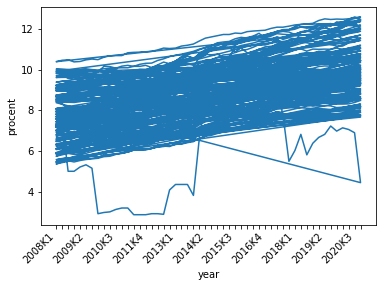

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#What is the change in percent of divorced danes from 2008 - 2020 ? 

Api1="https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=F&Tid=*"
Api2="https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=*&Tid=*&CIVILSTAND=TOT"

df=pd.read_csv(Api1,sep=';')
df2=pd.read_csv(Api2, sep =';')
#print(df)
#print(df2)

yearlist = list(df["TID"])
yrs = []

for i in yearlist:
    yrs.append(i[0:6])

    #print(yrs)
    
divorced=list(df["INDHOLD"])
total = list(df2["INDHOLD"])

pct = []

i = 0 
while i <len(df):
    pct.append(round(divorced[i]/total[i]*100,2))
    i += 1 
    

plt.plot(yrs,pct)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.xlabel("year")
plt.ylabel("procent")

a = plt.gca()
for index, label in enumerate(a.axes.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)



    
    

    
    
    
    

    
    






In [2]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
#area = 101,851,751,561,461
data_5b = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101%2C851%2C751%2C561%2C461&CIVILSTAND=U"

#Display data
df = pd.read_csv(data_5b, sep=';')
#print (df)

#paring data
data_dict = {}
i = 0 
while i < len(df):
    data_dict[df.iloc[i,0]] = df.iloc[i,3]
    i += 1
#print (data_dict)
print ("The city with the highest percentage of persons who's never been married in 2020 is:  " + (max(data_dict, key=lambda key: data_dict[key])))


The city with the highest percentage of persons who's never been married in 2020 is:  101 København


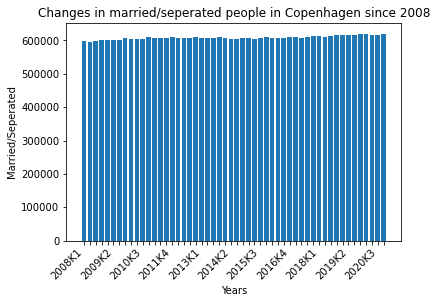

In [3]:
#5.C  Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&Tid=*&OMR%C3%85DE=084', sep=';')
years = df.loc[:,'TID']
amount_married = df.loc[:,'INDHOLD']

plt.bar(years, amount_married)
plt.title('Changes in married/seperated people in Copenhagen since 2008')
plt.xlabel('Years')
plt.ylabel('Married/Seperated')
plt.xticks(rotation=45, horizontalalignment='right')
ax = plt.gca()
for index, label in enumerate(ax.axes.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

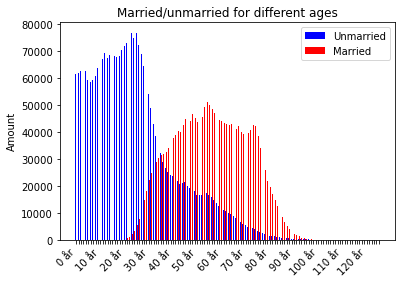

In [4]:
df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&ALDER=*&CIVILSTAND=U%2CG', sep=';')

age = df.ALDER.unique()
age = list(age)
age.pop(0)
unmarried = df.loc[df['CIVILSTAND'] == 'Ugift']['INDHOLD']
unmarried = list(unmarried)
unmarried.pop(0)
married = df.loc[df['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
married = list(married)
married.pop(0)

x = np.arange(len(age))
width = 0.35

plt.bar(x - width/2, unmarried, color='b', width=width, label='Unmarried')
plt.bar(x + width/2, married, color='r',  width=width, label='Married')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Amount')
plt.title('Married/unmarried for different ages')
plt.xticks(x)
plt.legend()

ax = plt.gca()

ax.set_xticklabels(age)
for index, label in enumerate(ax.axes.xaxis.get_ticklabels()):
    if index % 10 != 0:
        label.set_visible(False)